In [1]:
import matplotlib.pyplot as plt
import numpy as np
import astropy.units as u
import astropy.constants as c

In [2]:
%matplotlib inline
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['font.size'] = '20'
plt.rcParams['font.family'] = 'serif'
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True

In [229]:
bulge = np.loadtxt('ar4-bulges.dat.txt', dtype='str')

In [230]:
log_Mbulge_c = np.array(bulge[:21,16], 'float')
elog_Mbulge_c = np.array(bulge[:21,18], 'float')

log_Mbulge_p = np.array(bulge[21:,16], 'float')
elog_Mbulge_p = np.array(bulge[21:,18], 'float')

In [231]:
log_Mbh_c = np.log10(np.array(bulge[:21,19], 'float')*np.power(10, np.array(bulge[:21,25], 'float')))
minlog_Mbh_c = np.log10(np.array(bulge[:21,20], 'float')*np.power(10, np.array(bulge[:21,25], 'float')))
maxlog_Mbh_c = np.log10(np.array(bulge[:21,22], 'float')*np.power(10, np.array(bulge[:21,25], 'float')))
eminlog_Mbh_c = log_Mbh_c - minlog_Mbh_c
emaxlog_Mbh_c = - log_Mbh_c + maxlog_Mbh_c

log_Mbh_p = np.log10(np.array(bulge[21:,19], 'float')*np.power(10, np.array(bulge[21:,25], 'float')))
minlog_Mbh_p = np.log10(np.array(bulge[21:,20], 'float')*np.power(10, np.array(bulge[21:,25], 'float')))
maxlog_Mbh_p = np.log10(np.array(bulge[21:,22], 'float')*np.power(10, np.array(bulge[21:,25], 'float')))
eminlog_Mbh_p = log_Mbh_p - minlog_Mbh_p
emaxlog_Mbh_p = - log_Mbh_p + maxlog_Mbh_p

<ipython-input-231-4e9ec5671ca1>:8: RuntimeWarning: divide by zero encountered in log10
  minlog_Mbh_p = np.log10(np.array(bulge[21:,20], 'float')*np.power(10, np.array(bulge[21:,25], 'float')))


In [232]:
ellip = np.loadtxt('ar4-ellipticals.dat.txt', dtype='str')

In [233]:
log_Mellip = np.array(ellip[:,10], 'float')
elog_Mellip = np.array(ellip[:,12], 'float')

In [234]:
log_Mbh_e = np.log10(np.array(ellip[:,13], 'float')*np.power(10, np.array(ellip[:,19], 'float')))
minlog_Mbh_e = np.log10(np.array(ellip[:,14], 'float')*np.power(10, np.array(ellip[:,19], 'float')))
maxlog_Mbh_e = np.log10(np.array(ellip[:,16], 'float')*np.power(10, np.array(ellip[:,19], 'float')))
eminlog_Mbh_e = log_Mbh_e - minlog_Mbh_e
emaxlog_Mbh_e = - log_Mbh_e + maxlog_Mbh_e

In [235]:
Mbulge_c = np.power(10, log_Mbulge_c)
Mbh_c = np.power(10, log_Mbh_c)
eMbulge_c = (1 - np.power(10, - elog_Mbulge_c))*Mbulge_c
emin_Mbh_c = (1 - np.power(10, -eminlog_Mbh_c))*Mbh_c
emax_Mbh_c = (np.power(10, emaxlog_Mbh_c) - 1)*Mbh_c

Mellip = np.power(10, log_Mellip)
Mbh_e = np.power(10, log_Mbh_e)
eMellip = (1 - np.power(10, - elog_Mellip))*Mellip
emin_Mbh_e = (1 - np.power(10, -eminlog_Mbh_e))*Mbh_e
emax_Mbh_e = (np.power(10, emaxlog_Mbh_e) - 1)*Mbh_e

In [236]:
PG_bh = np.loadtxt('PG_bh.txt', dtype='str')
log_Mbh_PG = np.array(PG_bh[:,14], 'float')
PG_host = np.loadtxt('PG_bulge.txt', dtype='str')
log_Mbulge_PG = np.array(PG_host[:,9], 'float')
elog_Mbulge_PG = np.array(PG_host[:,10], 'float')

Mbulge_PG = np.power(10, log_Mbulge_PG)
Mbh_PG = np.power(10, log_Mbh_PG)
emin_Mbulge_PG = (1 - np.power(10, - elog_Mbulge_PG))*Mbulge_PG
emax_Mbulge_PG = (np.power(10, elog_Mbulge_PG) - 1)*Mbulge_PG

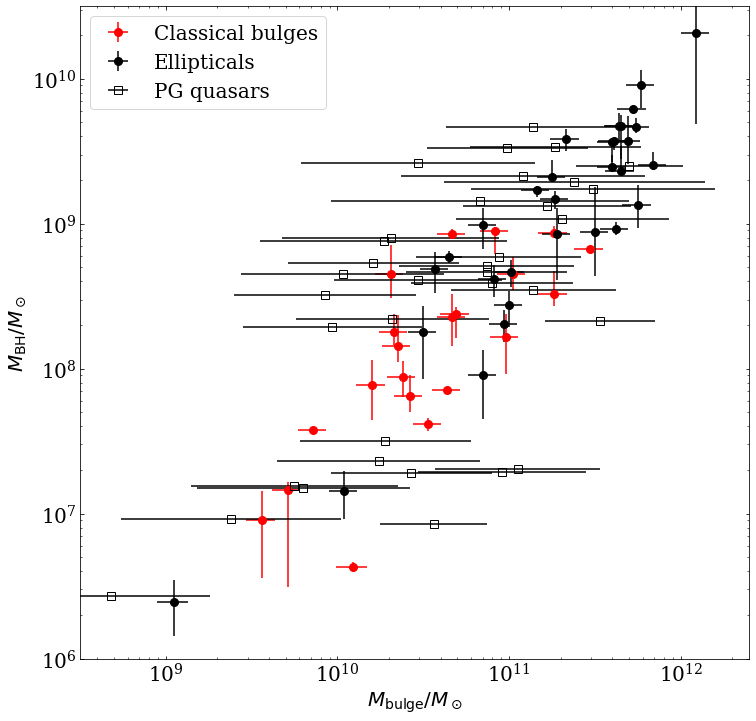

In [239]:
plt.figure(figsize=(12,12))
plt.errorbar(Mbulge_c, Mbh_c, xerr=eMbulge_c, yerr=[emin_Mbh_c, emax_Mbh_c], 
            fmt='ro', ms=8, capsize=0, label='Classical bulges')
#plt.errorbar(log_Mbulge_p, log_Mbh_p, xerr=elog_Mbulge_p, yerr=[eminlog_Mbh_p, emaxlog_Mbh_p], 
#            fmt='bo', ms=4, capsize=0, label='pseudobulge')
plt.errorbar(Mellip, Mbh_e, xerr=eMellip, yerr=[emin_Mbh_e, emax_Mbh_e], 
            fmt='ko', ms=8, capsize=0, label='Ellipticals')
plt.errorbar(Mbulge_PG, Mbh_PG, xerr=[emin_Mbulge_PG, emax_Mbulge_PG], 
            fmt='ks', mfc='none', ms=8, capsize=0, label='PG quasars')

plt.loglog()
plt.xlim(10**8.5, 10**12.4)
plt.ylim(10**6, 10**10.5)
plt.xlabel('$M_\mathrm{bulge}/M_\odot$')
plt.ylabel('$M_\mathrm{BH}/M_\odot$')

plt.legend()

In [184]:
x = np.append(log_Mbulge_c, log_Mellip)
y = np.append(log_Mbh_c, log_Mbh_e)
xerr = np.append(elog_Mbulge_c, elog_Mellip)
yminerr = np.append(eminlog_Mbh_c, eminlog_Mbh_e)
ymaxerr = np.append(emaxlog_Mbh_c, emaxlog_Mbh_e)

In [185]:
def log_likelihood(theta, x, y, xerr, yminerr, ymaxerr):
    m, b = theta
    model = m * x + b
    sigma2 = xerr**2 + yminerr ** 2 + ymaxerr**2# + model ** 2 * np.exp(2 * log_f)
    return -0.5 * np.sum((y - model) ** 2 / sigma2 + np.log(sigma2))

In [186]:
x0 = np.linspace(0,20,1000)

Maximum likelihood estimates:
m = 1.211
b = -4.624


Text(0, 0.5, '$\\log M_\\mathrm{BH}/M_\\odot$')

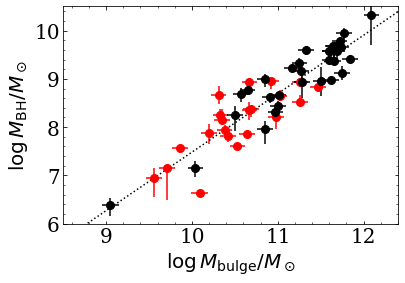

In [187]:
from scipy.optimize import minimize

np.random.seed(42)
nll = lambda *args: -log_likelihood(*args)
initial = np.array([1, -3]) + 0.1 * np.random.randn(2)
soln = minimize(nll, initial, args=(x, y, xerr, yminerr, ymaxerr))
m_ml, b_ml = soln.x

print("Maximum likelihood estimates:")
print("m = {0:.3f}".format(m_ml))
print("b = {0:.3f}".format(b_ml))


plt.errorbar(log_Mbulge_c, log_Mbh_c, xerr=elog_Mbulge_c, yerr=[eminlog_Mbh_c, emaxlog_Mbh_c], 
            fmt='ro', ms=8, capsize=0, label='Classical bulges')
#plt.errorbar(log_Mbulge_p, log_Mbh_p, xerr=elog_Mbulge_p, yerr=[eminlog_Mbh_p, emaxlog_Mbh_p], 
#            fmt='bo', ms=4, capsize=0, label='pseudobulge')
plt.errorbar(log_Mellip, log_Mbh_e, xerr=elog_Mellip, yerr=[eminlog_Mbh_e, emaxlog_Mbh_e], 
            fmt='ko', ms=8, capsize=0, label='Ellipticals')
plt.plot(x0, m_ml*x0+b_ml, 'k:', label='fit')
plt.xlim(8.5, 12.4)
plt.ylim(6, 10.5)
plt.xlabel('$\log M_\mathrm{bulge}/M_\odot$')
plt.ylabel('$\log M_\mathrm{BH}/M_\odot$')

In [188]:
def log_prior(theta):
    m, b = theta
    if -5.0 < m < 5.0 and -10.0 < b < 10.0:
        return 0.0
    return -np.inf

In [189]:
def log_probability(theta, x, y, xerr, yminerr, ymaxerr):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(theta, x, y, xerr, yminerr, ymaxerr)

In [190]:
import emcee
from multiprocessing import Pool

pos = soln.x + 1e-4 * np.random.randn(32, 2)
nwalkers, ndim = pos.shape
with Pool() as pool:
    sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability, args=(x, y, xerr, yminerr, ymaxerr), pool=pool)
    sampler.run_mcmc(pos, 5000, progress=True);

100%|██████████| 5000/5000 [00:27<00:00, 179.08it/s]


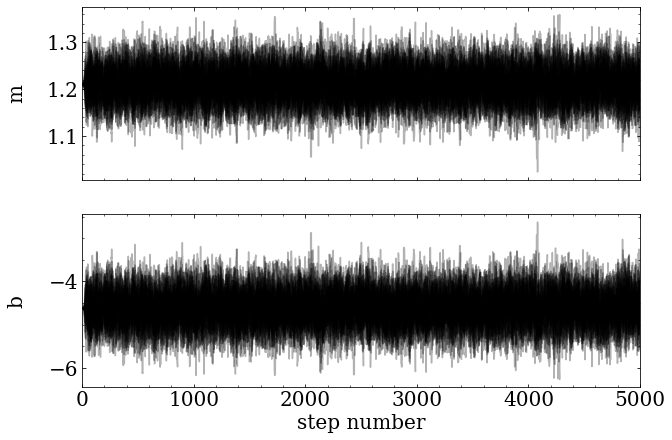

In [191]:
fig, axes = plt.subplots(2, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()
labels = ["m", "b"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");

In [192]:
tau = sampler.get_autocorr_time()
print(tau)

[31.52458287 31.55039657]


In [193]:
flat_samples = sampler.get_chain(discard=100, thin=15, flat=True)
print(flat_samples.shape)

(10432, 2)


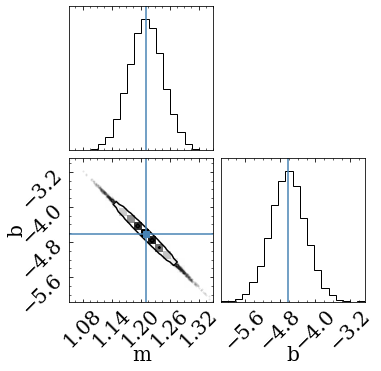

In [194]:
import corner

fig = corner.corner(
    flat_samples, labels=labels, truths=[m_ml, b_ml]
);

In [195]:
from IPython.display import display, Math

for i in range(ndim):
    mcmc = np.percentile(flat_samples[:, i], [16, 50, 84])
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
    txt = txt.format(mcmc[1], q[0], q[1], labels[i])
    display(Math(txt))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [201]:
Mbh_Tan = np.array([2.1, 3.2, 15.7, 0.4, 1.0, 0.8, 0.5, 1.0])*1e7
Mdyn_Tan = np.array([4.1, 1.1, 4.3, 1.6, 6.9, 0.9, 0.7, 1.3])*1e10
emin_Mdyn_Tan = Mdyn_Tan - (np.array([4.1, 1.1, 4.3, 1.6, 6.9, 0.9, 0.7, 1.3])
                 -np.array([0.7, 0.2, 0.8, 0.2, 1.8, 0.2, 0.2, 0.3]))*1e10
emax_Mdyn_Tan = (np.array([4.1, 1.1, 4.3, 1.6, 6.9, 0.9, 0.7, 1.3])
                 +np.array([0.7, 0.2, 0.8, 0.2, 1.8, 0.2, 0.2, 0.3]))*1e10 - Mdyn_Tan

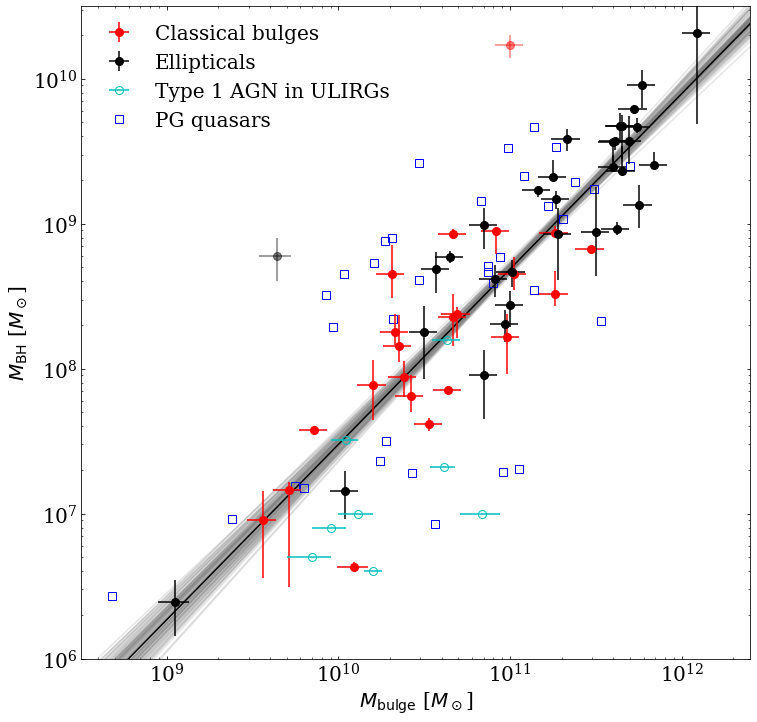

In [242]:
inds = np.random.randint(len(flat_samples), size=100)
x0 = np.logspace(6, 13, 1000)
y0 = 0.49*(x0/1e11)**1.17*1e9
plt.figure(figsize=(12,12))
for ind in inds:
    sample = flat_samples[ind]
    plt.plot(x0, np.power(10, sample[1])*np.power(x0, sample[0]), "grey", alpha=0.2)
plt.errorbar(Mbulge_c, Mbh_c, xerr=eMbulge_c, yerr=[emin_Mbh_c, emax_Mbh_c], 
            fmt='ro', ms=8, capsize=0, zorder=3, label='Classical bulges')
plt.errorbar(Mellip, Mbh_e, xerr=eMellip, yerr=[emin_Mbh_e, emax_Mbh_e], 
            fmt='ko', ms=8, capsize=0, zorder=3, label='Ellipticals')

plt.errorbar(10**11, 1.7e10, xerr=(1-10**(-0.09))*1e11, yerr=1.7e10-1.4e10, 
            fmt='ro', ms=8, capsize=0, zorder=3, alpha=0.5)
plt.errorbar(10**9.64, 6e8, xerr=(1-10**(-0.1))*10**9.64, yerr=6e8-4e8, 
            fmt='ko', ms=8, capsize=0, zorder=3, alpha=0.5)
plt.errorbar(Mdyn_Tan, Mbh_Tan, xerr=[emin_Mdyn_Tan, emax_Mdyn_Tan],
            fmt='co', mfc='none', ms=8, capsize=0, zorder=3, label='Type 1 AGN in ULIRGs')
plt.errorbar(Mbulge_PG, Mbh_PG,
            fmt='bs', mfc='none', ms=8, capsize=0, label='PG quasars')

plt.plot(x0, np.power(10, -4.622)*np.power(x0, 1.210), 'k')
#plt.plot(x0, y0, 'k:', label='Kormendy & Ho 2013')
plt.loglog()
plt.xlim(10**8.5, 10**12.4)
plt.ylim(10**6, 10**10.5)
plt.xlabel('$M_\mathrm{bulge}$ [$M_\odot$]')
plt.ylabel('$M_\mathrm{BH}$ [$M_\odot$]')
plt.legend(frameon=False)

plt.savefig('SMBH_bulge_mass.pdf', bbox_inches='tight', dpi=300)

In [171]:
9-11*1.17+np.log10(0.49)

-4.179803919971485